In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm # classifying with support vector machines
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Test different classifiers in sklearn
Best score is achieved for RandomForestClassifier

### Point cloud
This is the test data which is split into test and training data
- Random array of [x,y] value pairs within +/- 1.5 --> coordinates 
- 1000 points 
- value +1/-1 for each coordninate 

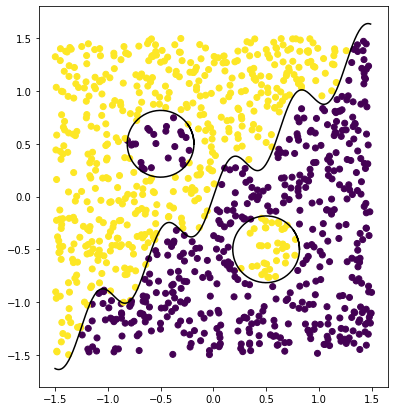

In [3]:
def con1(x,y):
    if y>=0.2*np.sin(10*x)+x:
        rv = 1
    else:
        rv = -1
    return rv

def con2(x,y):
    if (x+0.5)**2+(y-0.5)**2<= 0.1:
        rv = -2
    else:
        rv = 0
    return rv

def con3(x,y):
    if (x-0.5)**2+(y+0.5)**2<= 0.1:
        rv = 2
    else:
        rv = 0
    return rv

np.random.seed(0)

length=1000
xyset = 3.*(np.random.rand(length,2)-[0.5,0.5])
classes=[con1(xyset[i,0],xyset[i,1])+con2(xyset[i,0],xyset[i,1])+con3(xyset[i,0],xyset[i,1]) for i in range(len(xyset))]
# depending on x and y vaulue each position gets assingned +1 or -1

# print(np.shape(xyset))
# print(classes)
# print(xyset[:, 0])
# print(xyset[:, 1])

# function that plots data with the true boundaries to axes
def plotTrueBoundaries(ax):
    phiRange = np.arange(0,7,0.1)
    xRange = np.arange(-1.5,1.5,0.01)
    x1 = -0.5 + np.sqrt(0.1)*np.cos(phiRange)
    y1 =  0.5 + np.sqrt(0.1)*np.sin(phiRange)
    x2 =  0.5 + np.sqrt(0.1)*np.cos(phiRange)
    y2 = -0.5 + np.sqrt(0.1)*np.sin(phiRange)
    y3 =  0.2*np.sin(10*xRange) + xRange
    ax.plot(x1, y1,'black')
    ax.plot(x2, y2,'black')
    ax.plot(xRange, y3,'black')

plt.figure(figsize = (7,7))
plt.scatter(xyset[:, 0], xyset[:, 1], c = classes) # xyset[:, 0] = x-werte 
# how  to add a legend() to this which simply shows which color is -1,+1?
# c: A scalar or sequence of n numbers to be mapped to colors using cmap and norm 
plotTrueBoundaries(plt.gca())
plt.gca().set_aspect('equal')

### split data into train and test set

In [4]:
X = xyset # rename the input data, coordinates
y = classes #+-1 values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# random_state: int or RandomState instance, default=None
# Controls shuffling applied to data before applying split. Pass int for reproducible output across multiple function calls.

# check output
print(np.shape(X_train))
print(np.shape(y_train))

(750, 2)
(750,)


### svm.svc

Support-Vector_Machines (svm), Support-Vector-Classification (svc) 
In the case of support-vector machines, a data point is viewed as a p-dimensional vector (a list of p numbers), and we want to know whether we can separate such points with a (p-1)-dimensional hyperplane. So we choose the hyperplane so that the distance from it to the nearest data point on each side is maximized. Support vectors are the data points, which are closest to the hyperplane.

0.908


(-1.656327538865006,
 1.6577459289865155,
 -1.6574069093806623,
 1.6563429224015498)

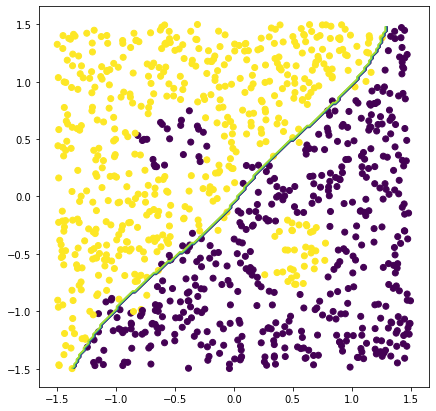

In [5]:
# create classifier
clf = svm.SVC()
clf.fit(X_train,y_train)
score = clf.score(X_test, y_test) # perecentage of correctly classified test data
print(score)

# plot 
plot_step = 0.02

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot()

# plot data points 

ax.scatter(xyset[:, 0], xyset[:, 1], c = classes)

# plot for classification boundaries
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel: Translates slice objects to concatenation along the second axis
Z = Z.reshape(xx.shape)
cs = ax.contour(xx, yy, Z)
ax.axis("tight")

### DecisionTreeClassifier



depth of max_depth = None : 12, score: 0.964
depth: 1, score: 0.696
depth: 2, score: 0.84
depth: 3, score: 0.852
depth: 4, score: 0.876
depth: 5, score: 0.872
depth: 6, score: 0.928
depth: 7, score: 0.936
depth: 8, score: 0.952
depth: 9, score: 0.964
depth: 10, score: 0.964
depth: 11, score: 0.956


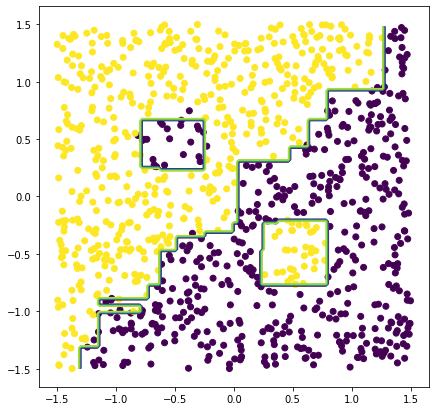

In [6]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
score = clf.score(X_test, y_test) # perecentage of correctly classified test data
print(f"depth of max_depth = None : {clf.get_depth()}, score: {score}")

# plot 
plot_step = 0.02

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot()

# plot data points 

ax.scatter(xyset[:, 0], xyset[:, 1], c = classes)

# plot for classification boundaries
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # Translates slice objects to concatenation along the second axis
Z = Z.reshape(xx.shape)
cs = ax.contour(xx, yy, Z)
ax.axis("tight")

for i in range(1,12):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train,y_train)
    score = clf.score(X_test, y_test) # perecentage of correctly classified test data
    print(f"depth: {clf.get_depth()}, score: {score}")

By limiting the depth of the tree, the score can be optimized. Limiting the depth to 10 or 11 leads to an improved result. This is due to overfitting which starts at a certain point, in this case apparently at depth = 12. The method of limiting the depth is called Early Stopping. 

### RandomForestClassifier

0.968


(-1.656327538865006,
 1.6577459289865155,
 -1.6574069093806623,
 1.6563429224015498)

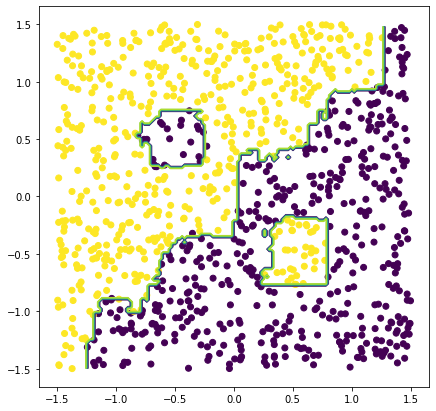

In [7]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test) # perecentage of correctly classified test data
print(score)

# plot 
plot_step = 0.02

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot()

# plot data points 

ax.scatter(xyset[:, 0], xyset[:, 1], c = classes)

# plot for classification boundaries
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # Translates slice objects to concatenation along the second axis
Z = Z.reshape(xx.shape)
cs = ax.contour(xx, yy, Z)
ax.axis("tight")

### AdaBoostClassifier

score: 0.904


(-1.656327538865006,
 1.6577459289865155,
 -1.6574069093806623,
 1.6563429224015498)

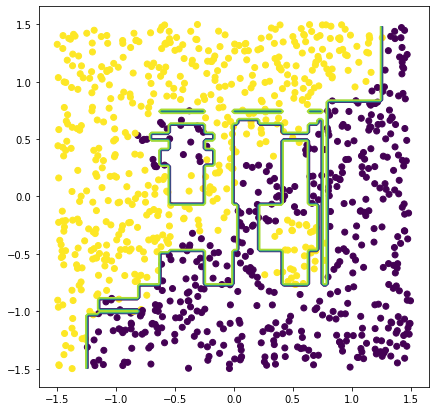

In [8]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test) # perecentage of correctly classified test data
print(f"score: {score}")

# plot 
plot_step = 0.02

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot()

# plot data points 

ax.scatter(xyset[:, 0], xyset[:, 1], c = classes)

# plot for classification boundaries
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # Translates slice objects to concatenation along the second axis
Z = Z.reshape(xx.shape)
cs = ax.contour(xx, yy, Z)
ax.axis("tight")